In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
import sys, os
sys.path.append('../')
from extract_image import *


def get_spline(image_rgb, color):

    # Define color range (tune as needed)
    params = {'green':
                {'lower': np.array([0, 128, 0]), # Lower bound for green in RGB
                 'upper': np.array([100, 255, 100]), # Upper bound for green in RGB
                 's': 3900}, 
              'orange':             
                {'lower': np.array([200, 100, 0]),  # Lower bound for orange in RGB
                 'upper': np.array([255, 180, 80]),  # Upper bound for orange in RGB
                 's': 3500},
              'blue':
                {'lower': np.array([20, 90, 150]),  # Lower bound for blue in RGB
                 'upper': np.array([50, 140, 200]),  # Upper bound for blue in RGB
                 's':2000}
            }
    
    param = params[color]
    lower, upper, s = param['lower'], param['upper'], param['s']

    # Create a mask for the pixels of that color
    mask = cv2.inRange(image_rgb, lower, upper)

    # Extract the coordinates of green pixels
    color_pixels = np.column_stack(np.where(mask > 0))
    y_coords, x_coords = color_pixels[:, 0], color_pixels[:, 1]
    
    # only take the smaller values (so that legend pixels are not included)
    mask_coords = x_coords < 800
    x_coords = x_coords[mask_coords]
    y_coords = y_coords[mask_coords]

    perm = np.argsort(x_coords)
    x_coords, y_coords = x_coords[perm], y_coords[perm]

    # Fit a spline to the green pixel coordinates
    spline = splrep(x_coords, y_coords, s=s)  # s=0 means no smoothing
    
    return spline


n = np.arange(1, 2000)
x_spline = grads2x(n) 

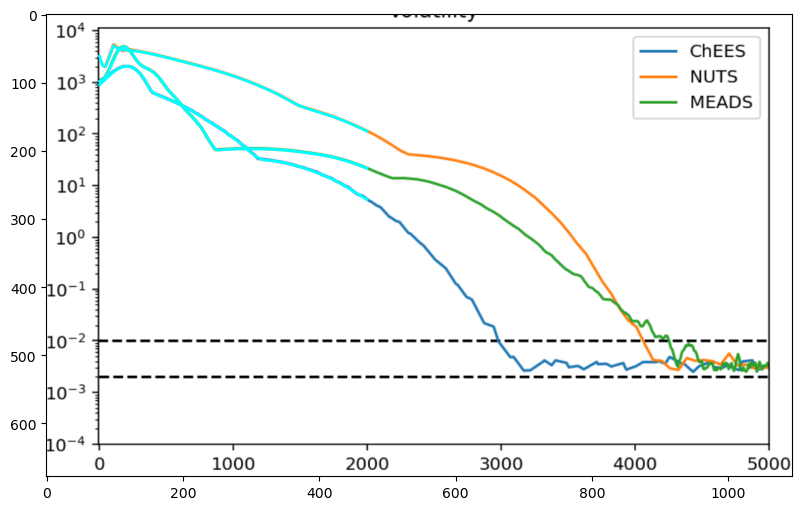

In [3]:

# Load the image
image_path = "sv.png"  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Plot the results
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
#plt.scatter(x_coords, y_coords, color="red", s=1, label="Extracted Green Pixels")

for color in ['green', 'orange', 'blue']:
    spline = get_spline(image_rgb, color)
    y_spline = splev(x_spline, spline)
    plt.plot(x_spline, y_spline, color="cyan", linewidth=2)
    
# plt.xlim(0, 300)
# plt.ylim(250, 0)
plt.show()

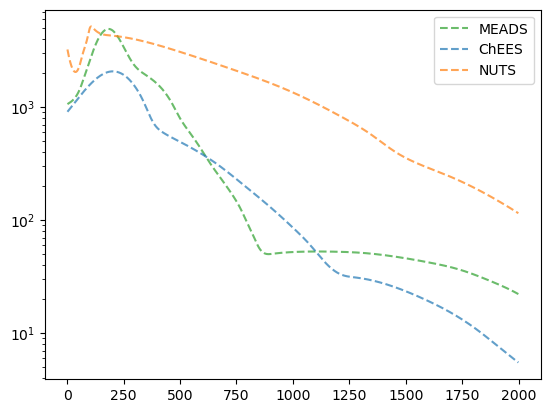

In [ ]:
for (label, color) in third_party_methods:
    spline1 = get_spline(image_rgb, color)
    name = label + '.npz'
    save_spline(name, spline1)
    plt.plot(n, imported_plot(n, name), '--', color= 'tab:'+color, label= label, alpha = 0.7)
    
plt.legend()
plt.yscale('log')
plt.show()

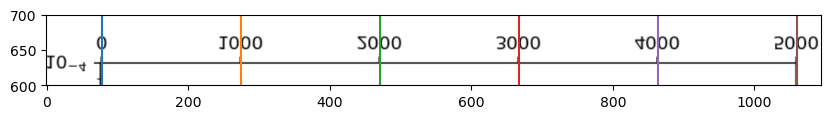

In [38]:
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)

phase, period = 77.5, 196.4
for k in range(6):
    plt.plot(np.ones(2) * (phase + k * period), [600, 700])

plt.ylim(600, 700)
#t = phase + 0 * period
#plt.xlim(t - 5, t + 5)
plt.show()

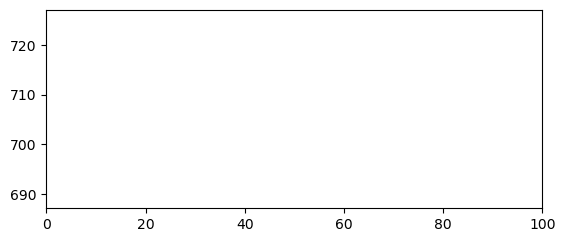

In [64]:
#plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)

phase, period = 24., 75.9
num_cycles = 9
for k in range(num_cycles):
    plt.plot([0, 100], np.ones(2) * (phase + k * period),)

plt.xlim(0, 100)
#t = phase + 0 * period
t = phase + (num_cycles) * period
plt.ylim(t - 20, t + 20)
plt.show()